<a href="https://colab.research.google.com/github/zulfacn/PortoFolio/blob/master/McDonalds'_Nutrition_Fact_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# McDonald's Nutrition Fact Exploratory Data Analysis

## What kind of information we can gain from dataset through EDA?

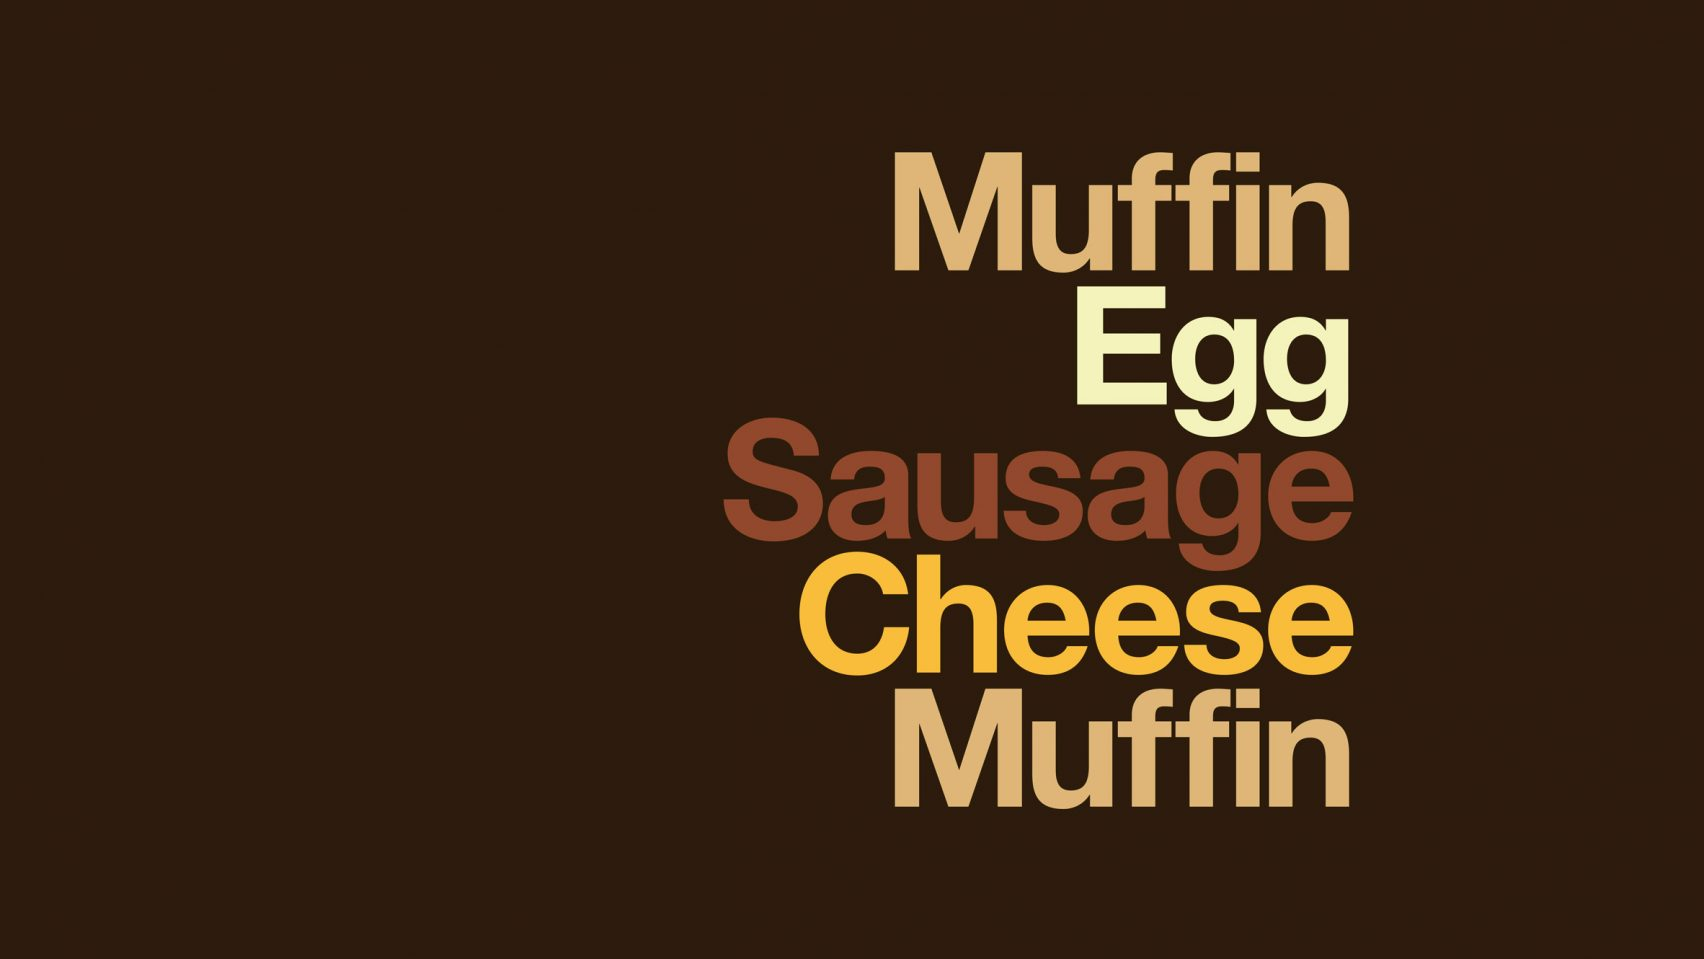

McDonalds, the synonims of fast food culture. The Big Mac, Cheese Burger, 
Muffin, and Chicken Mc Nuggets are probably the names we know from our daily life, considering McDonlad's worldwide popularity. Here we can do Exploratory Data Analysis and see how each variables correlation. Later, we will cluster the menus using machine learning. 

---

### **The Steps that we are going to do**


1.   Importing needed libraries.
2.   Reading the dataset from CSV file 
3.   Check the dataset if there were any missing value. 
4.   Data Visualization
5.   Exploritory Data Analysis 

##### **1. Importing Libraries** 



In [10]:
pip install pulp

In [11]:
import numpy as np
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from pulp import *
from tabulate import tabulate
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os
import plotly.figure_factory as ff

##### **2. Reading dataset from CSV**

Dataset downloaded from open data portal kaggle: https://www.kaggle.com/mcdonalds/nutrition-facts/notebooks.

In [12]:
uploaded = files.upload()

Saving menu.csv to menu (1).csv


In [13]:
# read dataset from csv as dataframe 
df = pd.read_csv(io.BytesIO(uploaded['menu.csv']))
print(df)

               Category  ... Iron (% Daily Value)
0             Breakfast  ...                   15
1             Breakfast  ...                    8
2             Breakfast  ...                   10
3             Breakfast  ...                   15
4             Breakfast  ...                   10
..                  ...  ...                  ...
255  Smoothies & Shakes  ...                    8
256  Smoothies & Shakes  ...                   10
257  Smoothies & Shakes  ...                    6
258  Smoothies & Shakes  ...                    6
259  Smoothies & Shakes  ...                    4

[260 rows x 24 columns]


#### 3. Check if the data contain any missing value 

In [14]:
# Check for Missing value
print(df.isnull().any())
print("--------------------------------------")
# check for numbers
print(df.describe())
print("--------------------------------------")

Category                         False
Item                             False
Serving Size                     False
Calories                         False
Calories from Fat                False
Total Fat                        False
Total Fat (% Daily Value)        False
Saturated Fat                    False
Saturated Fat (% Daily Value)    False
Trans Fat                        False
Cholesterol                      False
Cholesterol (% Daily Value)      False
Sodium                           False
Sodium (% Daily Value)           False
Carbohydrates                    False
Carbohydrates (% Daily Value)    False
Dietary Fiber                    False
Dietary Fiber (% Daily Value)    False
Sugars                           False
Protein                          False
Vitamin A (% Daily Value)        False
Vitamin C (% Daily Value)        False
Calcium (% Daily Value)          False
Iron (% Daily Value)             False
dtype: bool
--------------------------------------
          Cal

In [15]:
# Grouped table based on its category and find the mean from each nutrition facts 
df.groupby('Category').agg(['mean'])

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Category,,,,,,,,,,,,,,,,,,,,,
Beef & Pork,494.000000,224.666667,24.866667,38.600000,10.466667,52.000000,1.100000,87.333333,28.933333,1020.666667,42.466667,40.133333,13.466667,2.533333,9.866667,8.800000,27.333333,6.933333,7.333333,23.000000,23.333333
Beverages,113.703704,0.740741,0.092593,0.148148,0.055556,0.296296,0.000000,0.555556,0.185185,41.481481,1.740741,28.814815,9.592593,0.037037,0.074074,27.851852,1.333333,0.740741,23.481481,2.962963,0.296296
Breakfast,526.666667,248.928571,27.690476,42.666667,10.654762,53.428571,0.107143,152.857143,50.952381,1211.071429,50.500000,49.761905,16.571429,3.261905,12.833333,8.261905,19.857143,6.928571,8.904762,16.166667,17.142857
Chicken & Fish,552.962963,242.222222,26.962963,41.333333,6.166667,31.111111,0.129630,75.370370,25.222222,1257.777778,52.333333,49.074074,16.333333,2.925926,11.814815,7.333333,29.111111,20.444444,12.629630,15.444444,16.370370
Coffee & Tea,283.894737,71.105263,8.021053,12.357895,4.921053,24.368421,0.142105,27.263158,9.378947,136.894737,5.726316,44.526316,14.863158,0.778947,3.178947,39.610526,8.863158,10.736842,0.000000,28.294737,2.147368
Desserts,222.142857,64.285714,7.357143,11.142857,4.285714,21.285714,0.000000,15.000000,4.857143,117.142857,5.000000,34.857143,11.571429,1.000000,3.428571,26.142857,4.000000,5.142857,4.142857,11.428571,4.000000
Salads,270.000000,108.333333,11.750000,18.333333,3.750000,18.500000,0.000000,51.666667,17.333333,588.333333,24.500000,21.666667,7.166667,4.500000,18.500000,6.833333,19.833333,146.666667,28.333333,15.000000,10.333333
Smoothies & Shakes,531.428571,127.678571,14.125000,21.714286,8.375000,41.785714,0.535714,45.000000,14.714286,183.571429,7.785714,90.428571,30.142857,1.464286,5.750000,77.892857,10.857143,18.750000,6.964286,35.571429,3.964286


By performing the aggregation of the content values across the menu category wise, We get to know that:

1.   In overall menu of MacDonald, breakfast is the category that has highest percentage of fat, cholesterol, sodium and saturated fat. In addition to that their breakfast items are very low in percentage of goodness contents that are vitamins A, Vitamin C, dietary fibers etc.
2.   On the second-place Beef and pork items in the menu can satisfy 38% of the daily value of fat and 42 % of daily value of sodium. In other words , this means a single item of “Beef & Pork” can provide daily recommended fat consumption by this amount.
3.   Salads in the menu is the category that can satisfy 146 % of your daily recommended Vitamin A consumption.
4.   Smoothies & shakes provide 35 % of your daily overall calcium recommended consumption .

#### **3. Data Visualization**

In this part we will see using matrix correlation chart how each variables correlated with other variables. Then we will use pie chart to see the data distribution by its categories. 

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['permutation', 'log']
`%matplotlib` prevents importing * from pylab and numpy



Text(0.5, 1.0, 'Nutrition Value Correlation')

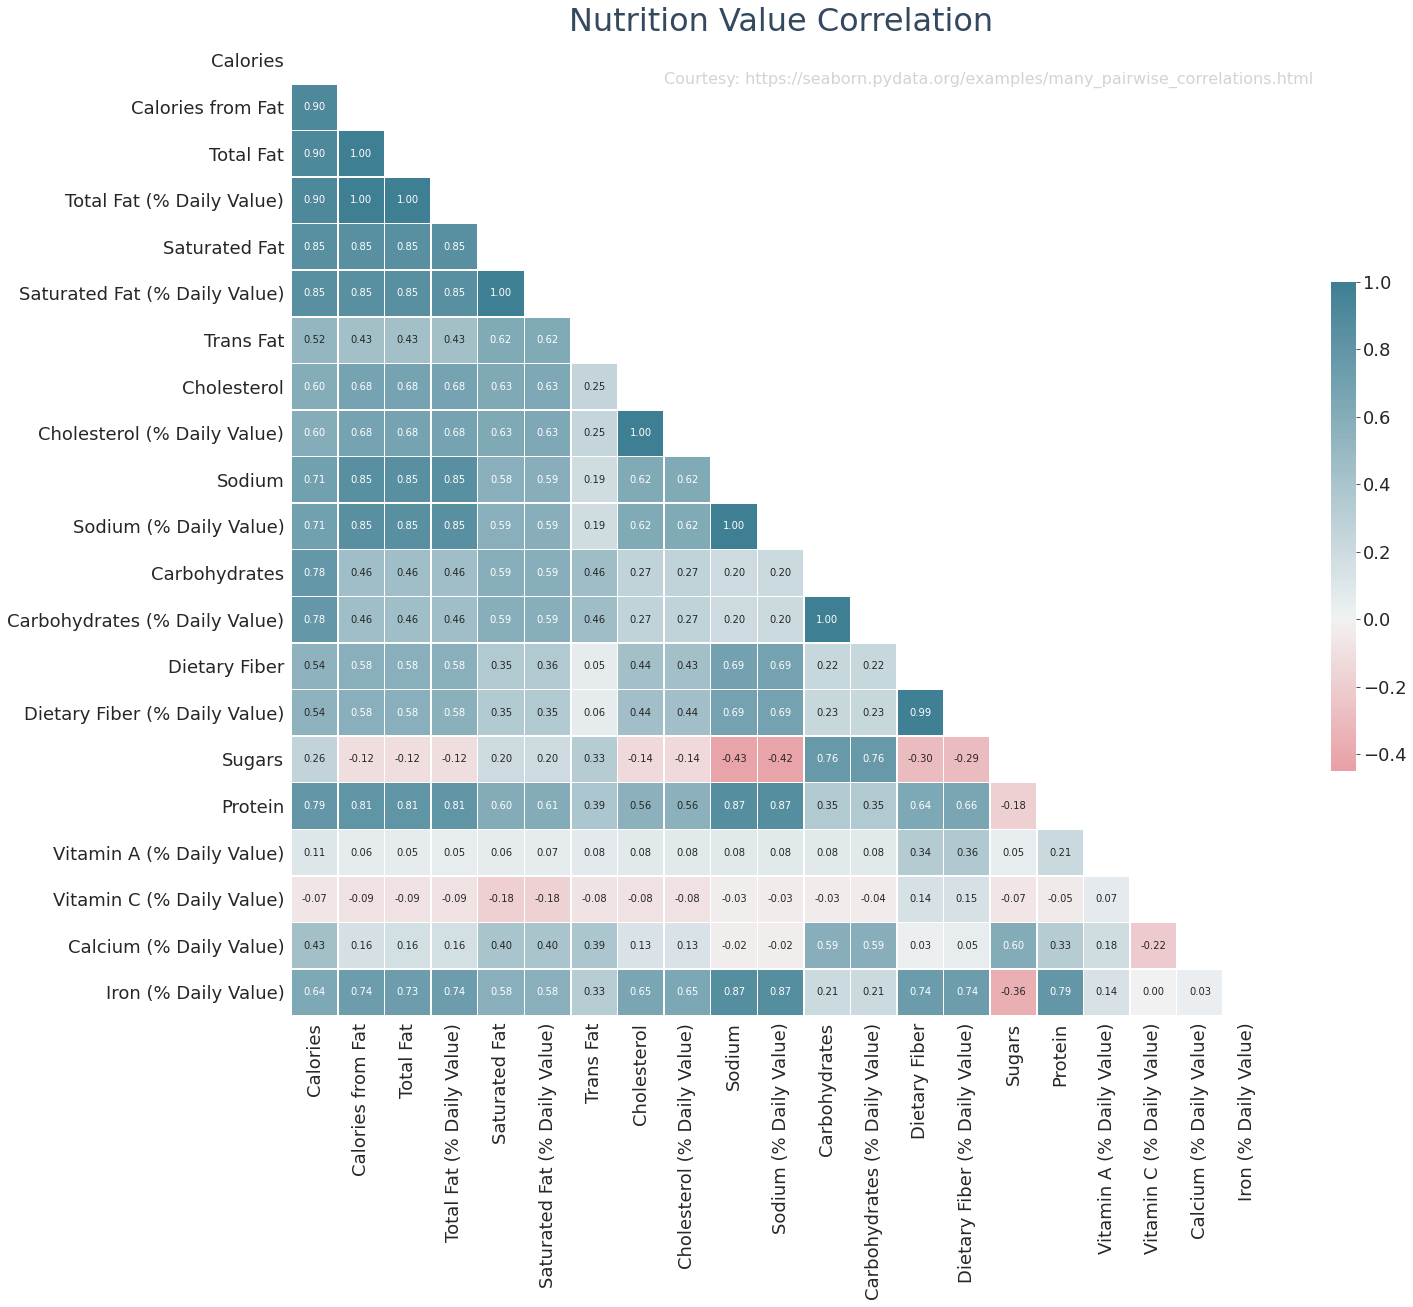

In [16]:
# Correlation Plot
from matplotlib import cm as cm

import matplotlib as mpl
%pylab inline
label_size = 18
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

sns.set_style("whitegrid")
mask = np.zeros_like(df[df.columns[3:]].corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (22,18))

cmap = sns.diverging_palette(10,220, as_cmap = True)  #10,133

#Draw
sns.heatmap(df[df.columns[3:]].corr(), mask = mask, vmax = 1, vmin = -.45, center = 0,cmap=cmap,
           annot = True, square = True, linewidth = .5, cbar_kws = {'shrink':.5}, fmt= '.2f')
plt.text(8, 1, 'Courtesy: https://seaborn.pydata.org/examples/many_pairwise_correlations.html', fontsize=16,alpha=0.2)
plt.title("Nutrition Value Correlation", loc = 'center', size = 32, color = '#34495E')
#plt.savefig('Correlation Matrix'+'.png', bbox_inches = 'tight')

Calories was highly correlated positively to
1.   Calories from Fat
2.   Total Fat
3.   Saturated Fat
4.   Sodium
5.   Carbohydrates


Plot also highlights Sodium <–> Protien <—> Iron are highly correlated  positively. Even Carbohydrates and Sugars show good bonding positively There is some week bonding of -4 between Sodium , Sugar and Iron.#

In [17]:
# change the name of category to easily understand name

categories = np.array(df.Category.unique())
print(categories)
breakfastMeals = df[df.Category == 'Breakfast']
beef_porkMeals = df[df.Category == 'Beef & Pork']
chicken_fishMeals = df[df.Category == 'Chicken & Fish']
saladMeals = df[df.Category == 'Salads']
snacks_sidesMeals = df[df.Category == 'Snacks & Sides']
desserts = df[df.Category == 'Desserts']
beverages = df[df.Category == 'Beverages']
coffee_tea = df[df.Category == 'Coffee & Tea']
smoothies_shakes = df[df.Category == 'Smoothies & Shakes']

['Breakfast' 'Beef & Pork' 'Chicken & Fish' 'Salads' 'Snacks & Sides'
 'Desserts' 'Beverages' 'Coffee & Tea' 'Smoothies & Shakes']


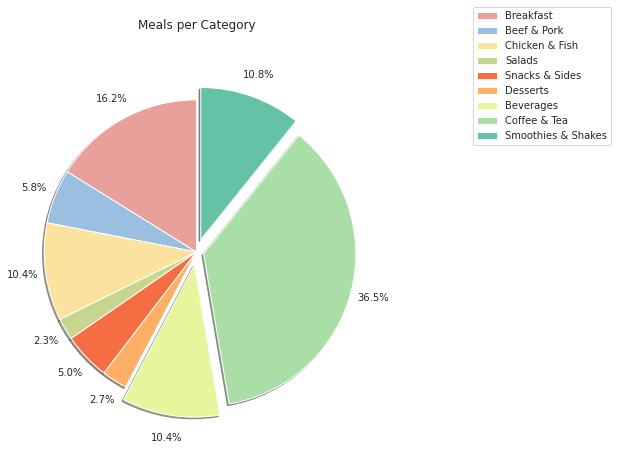

In [18]:
amtPerCategory = np.array([breakfastMeals.shape[0], 
                           beef_porkMeals.shape[0], 
                           chicken_fishMeals.shape[0],
                           saladMeals.shape[0],
                           snacks_sidesMeals.shape[0],
                           desserts.shape[0],
                           beverages.shape[0],
                           coffee_tea.shape[0],
                           smoothies_shakes.shape[0]
                          ])
colors = np.array(['#E8A09A', '#9BBFE0', '#FBE29F', '#C6D68F',
                  '#F66D44','#FEAE65', '#E6F69D', '#AADEA7', '#64C2A6'])
plt.pie(amtPerCategory, labels=None, colors=colors,pctdistance=1.15,startangle=90,shadow=True,
       explode=(0,0,0,0,0,0,0.15,0.085,0.15), autopct='%1.1f%%',radius = 1.75)

#sclae the title up to match the pctdistance
plt.title("Meals per Category", y=1.5)
#add legend
plt.legend(labels=categories, bbox_to_anchor=(1.75,0.15,1.5,1.5), loc="upper left") 
plt.gca().set_aspect('equal')

Based on the pie chart above, 36.5% dataset are from Coffee & Tea menu category, and the least menu category are from Deserts. 



#### **4. Exploratory Data Analysis**

In this part we will do exploratory data analysis to gain insigths and informations based on the data. 

In [19]:
df_category = df.groupby('Category', axis=0)
print(df_category['Calories'].mean().sort_values(ascending=False).to_frame(), "\n")
print('The average McDonalds value meal contain: %f calories' % (df.loc[:,"Calories"].mean()))

                      Calories
Category                      
Chicken & Fish      552.962963
Smoothies & Shakes  531.428571
Breakfast           526.666667
Beef & Pork         494.000000
Coffee & Tea        283.894737
Salads              270.000000
Snacks & Sides      245.769231
Desserts            222.142857
Beverages           113.703704 

The average McDonalds value meal contain: 368.269231 calories


The average Mc Donalds meals contain 368.269 calories. The highest calories come from  Chicken and Fish meny category.



---
Next, we want to see which top 3 category contibutes highest calory intake.


In [20]:
df.groupby(['Category'])['Calories'].sum()

Category
Beef & Pork            7410
Beverages              3070
Breakfast             22120
Chicken & Fish        14930
Coffee & Tea          26970
Desserts               1555
Salads                 1620
Smoothies & Shakes    14880
Snacks & Sides         3195
Name: Calories, dtype: int64

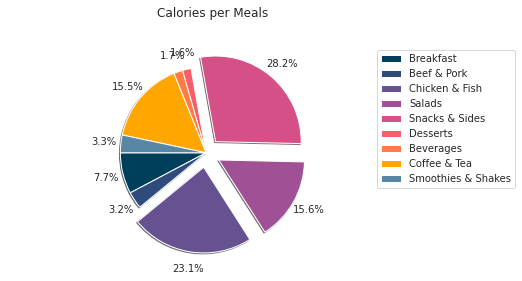

In [23]:


# setup data
labels = df['Category'].unique()
cal  = df.groupby(['Category'])['Calories'].sum()
sizes = [i*100./cal.sum() for i in cal]

# plot data
plt.pie(sizes, 
        autopct='%1.1f%%', 
        pctdistance=1.2, 
        explode=(0,0,0.30,0.30,0.30,0,0,0,0), 
        shadow=True, 
        startangle=180,
        radius=1.75,
        colors=(['#003f5c','#2f4b7c','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600','#5886a5']))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# setup plot component
plt.title('Calories per Meals', y=1.1)
plt.tight_layout()
plt.legend(labels=labels, bbox_to_anchor=(0.75,0.5,0.5,0.5), loc="best") 

# plot show
plt.show()

From the pie chart we find that Category Chicken & Fish, Saladsm and Snack & Sides contribute highest calory intake from all categories. 



---

For the next part we want to compare nutritional value from grilled and crispy chicken sandwich. Is it Crispy Chicken or Grilled Chicken who has higher nutritional value. 

Before we do the analysis, we have to initialize what are the paramater needed ti get nutritional value. Threre are seven parameters to fulfill nutritional value; Calories, Fat, Saturates, Carbohydrates, Sugar, Protein, Salt. 

We will compare the nutritional value using boxplot. 


In [24]:
# make new dataframe with all menus using grilled and crispy chicken 
dfchickensandwich=df[(df["Item"]=="Premium Crispy Chicken Classic Sandwich")|(df["Item"]=="Premium Crispy Chicken Club Sandwich")|(df["Item"]=="Premium Crispy Chicken Ranch BLT Sandwich")|(df["Item"]=="Bacon Clubhouse Crispy Chicken Sandwich")|(df["Item"]=="Premium Grilled Chicken Classic Sandwich")|(df["Item"]=="Premium Grilled Chicken Club Sandwich")|(df["Item"]=="Premium Grilled Chicken Ranch BLT Sandwich")|(df["Item"]=="Bacon Clubhouse Grilled Chicken Sandwich")]
dfchickensandwich.reset_index(inplace=True)
dfchickensandwich

,index,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,57,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,7.5 oz (213 g),510,200,22.0,33,3.5,18,0.0,45,16,990,41,55,18,3,13,10,24,4,6,15,20
1,58,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,7 oz (200 g),350,80,9.0,13,2.0,9,0.0,65,22,820,34,42,14,3,13,8,28,4,8,15,20
2,59,Chicken & Fish,Premium Crispy Chicken Club Sandwich,8.8 oz (249 g),670,300,33.0,51,9.0,44,0.0,85,29,1410,59,58,19,3,14,11,36,8,20,30,20
3,60,Chicken & Fish,Premium Grilled Chicken Club Sandwich,8.3 oz (235 g),510,180,20.0,31,7.0,36,0.0,105,35,1250,52,44,15,3,13,9,40,8,20,30,20
4,61,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,8.1 oz (230 g),610,250,28.0,43,6.0,31,0.0,70,24,1400,58,57,19,3,13,11,32,4,20,15,20
5,62,Chicken & Fish,Premium Grilled Chicken Ranch BLT Sandwich,7.6 oz (217 g),450,130,15.0,23,4.5,22,0.0,90,30,1230,51,43,14,3,13,9,36,4,20,15,20
6,63,Chicken & Fish,Bacon Clubhouse Crispy Chicken Sandwich,10 oz (284 g),750,340,38.0,59,10.0,51,0.5,90,31,1720,72,65,22,4,15,16,36,8,25,30,15
7,64,Chicken & Fish,Bacon Clubhouse Grilled Chicken Sandwich,9.5 oz (270 g),590,230,25.0,39,8.0,42,0.0,110,37,1560,65,51,17,4,15,14,40,8,30,30,15


In [25]:
del dfchickensandwich['Category']
dfchickensandwich['Category']='Crispy','Grilled','Crispy','Grilled','Crispy','Grilled','Crispy','Grilled'
dfchickensandwich.head()

,index,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Category
0,57,Premium Crispy Chicken Classic Sandwich,7.5 oz (213 g),510,200,22.0,33,3.5,18,0.0,45,16,990,41,55,18,3,13,10,24,4,6,15,20,Crispy
1,58,Premium Grilled Chicken Classic Sandwich,7 oz (200 g),350,80,9.0,13,2.0,9,0.0,65,22,820,34,42,14,3,13,8,28,4,8,15,20,Grilled
2,59,Premium Crispy Chicken Club Sandwich,8.8 oz (249 g),670,300,33.0,51,9.0,44,0.0,85,29,1410,59,58,19,3,14,11,36,8,20,30,20,Crispy
3,60,Premium Grilled Chicken Club Sandwich,8.3 oz (235 g),510,180,20.0,31,7.0,36,0.0,105,35,1250,52,44,15,3,13,9,40,8,20,30,20,Grilled
4,61,Premium Crispy Chicken Ranch BLT Sandwich,8.1 oz (230 g),610,250,28.0,43,6.0,31,0.0,70,24,1400,58,57,19,3,13,11,32,4,20,15,20,Crispy


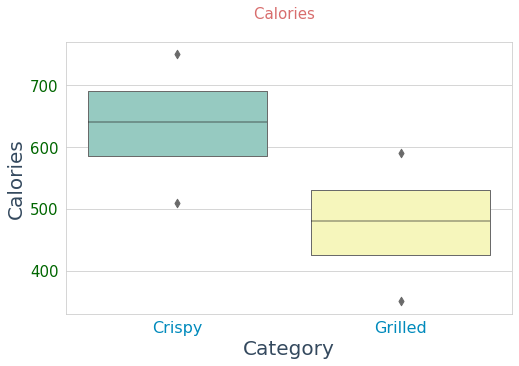

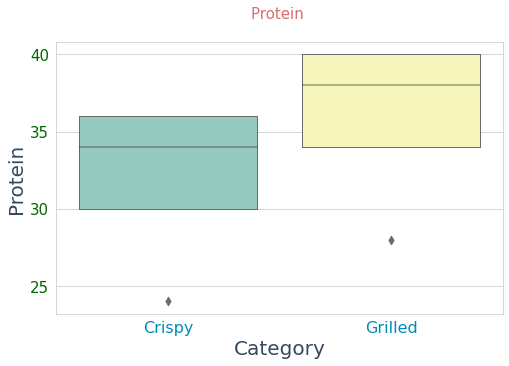

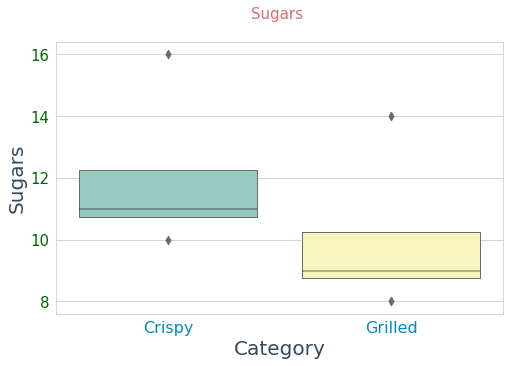

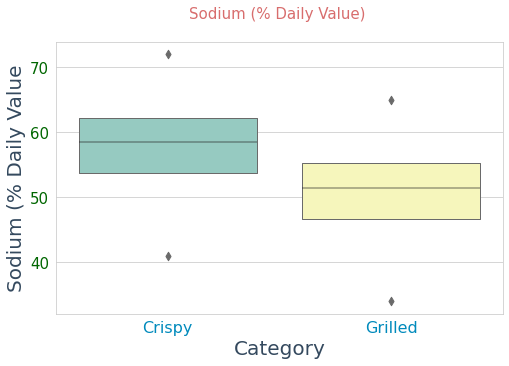

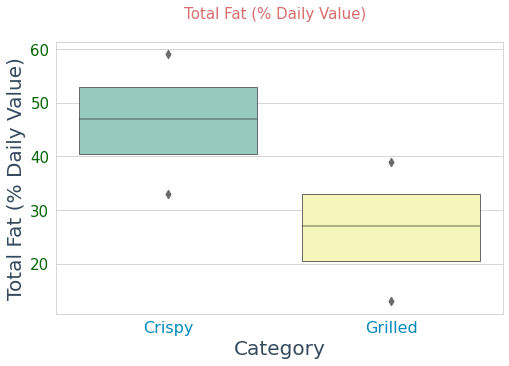

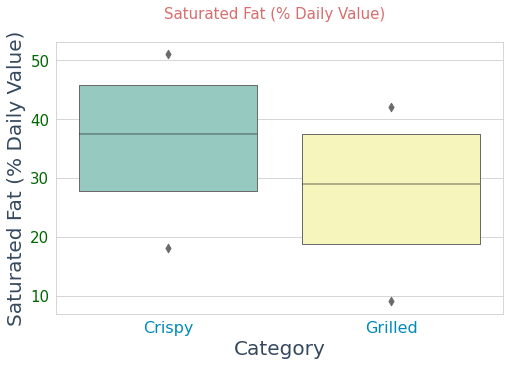

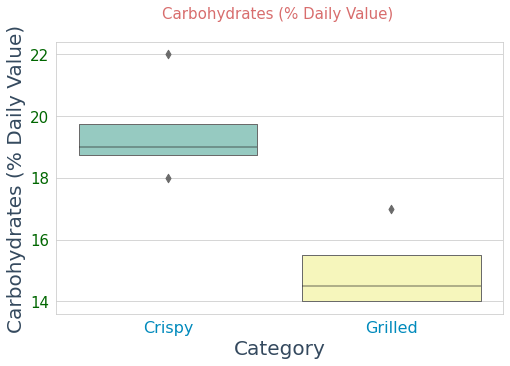

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Calories', data=dfchickensandwich, color='#eeeeee', palette="Set3")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Calories  \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Calories',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Protein', data=dfchickensandwich, color='#eeeeee', palette="Set3")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Protein \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Protein',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()


ax = sns.boxenplot(x="Category", y='Sugars', data=dfchickensandwich, color='#eeeeee', palette="Set3")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Sugars \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Sugars',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Sodium (% Daily Value)', data=dfchickensandwich, color='#eeeeee', palette="Set3")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Sodium (% Daily Value) \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Sodium (% Daily Value',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()


ax = sns.boxenplot(x="Category", y='Total Fat (% Daily Value)', data=dfchickensandwich, color='#eeeeee', palette="Set3")


# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Total Fat (% Daily Value)  \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Total Fat (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Saturated Fat (% Daily Value)', data=dfchickensandwich, color='#eeeeee', palette="Set3")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Saturated Fat (% Daily Value)  \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Saturated Fat (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Carbohydrates (% Daily Value)', data=dfchickensandwich, color='#eeeeee', palette="Set3")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Carbohydrates (% Daily Value) \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Carbohydrates (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')
plt.show()

Based on the boxplot above, six categories (Calories, Sugras, Sodium, Total Fat, Saturated Fat, and Cabohydrates) for Crispy Chicken are higher in value. Meanwhile from Protein for Grilled Chicken is higher than value. Yes, ordering Crispy Chicken Sandwich give higher nutritional value.



---

Next, we will compare nutritional value when we order menu with whole egg and white egg. The process is same with the previous one. 

In [27]:
 #make data frame for menu with egg and whole eggs
df_eggmerge=df[(df["Item"]=="Bacon, Egg & Cheese Biscuit (Regular Biscuit)")|(df["Item"]=="Bacon, Egg & Cheese Biscuit (Large Biscuit)")|
          (df["Item"]=="Sausage Biscuit with Egg (Regular Biscuit)")|(df["Item"]=="Sausage Biscuit with Egg (Large Biscuit)")|
          (df["Item"]=="Bacon, Egg & Cheese McGriddles")|(df["Item"]=="Sausage, Egg & Cheese McGriddles")|
          (df["Item"]=="Bacon, Egg & Cheese Bagel")|(df["Item"]=="Big Breakfast (Regular Biscuit)")|(df["Item"]=="Big Breakfast (Large Biscuit)")|
          (df["Item"]=="Big Breakfast with Hotcakes (Regular Biscuit)")|(df["Item"]=="Big Breakfast with Hotcakes (Large Biscuit)")|
          (df["Item"]=="Bacon, Egg & Cheese Biscuit with Egg Whites (Regular Biscuit)")|(df["Item"]=="Bacon, Egg & Cheese Biscuit with Egg Whites (Large Biscuit)")|
          (df["Item"]=="Sausage Biscuit with Egg Whites (Regular Biscuit)")|(df["Item"]=="Sausage Biscuit with Egg Whites (Large Biscuit)")|
          (df["Item"]=="Bacon, Egg & Cheese McGriddles with Egg Whites")|(df["Item"]=="Sausage, Egg & Cheese McGriddles with Egg Whites")|
          (df["Item"]=="Bacon, Egg & Cheese Bagel with Egg Whites")| (df["Item"]=="Big Breakfast with Egg Whites (Regular Biscuit)")|
          (df["Item"]=="Big Breakfast with Egg Whites (Large Biscuit)")|(df["Item"]=="Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit)")|
          (df["Item"]=="Big Breakfast with Hotcakes and Egg Whites (Large Biscuit)")]

df_eggmerge.reset_index(inplace=True)

In [28]:
df_eggmerge.head()

,index,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,250,83,1300,54,38,13,2,7,3,19,10,8,15,15
1,7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,250,83,1410,59,43,14,3,12,4,19,15,8,20,20
2,8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,35,11,1300,54,36,12,2,7,3,20,2,8,15,10
3,9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,35,11,1420,59,42,14,3,12,4,20,6,8,15,15
4,12,Breakfast,Sausage Biscuit with Egg (Regular Biscuit),5.7 oz (163 g),510,290,33.0,50,14.0,71,0.0,250,83,1170,49,36,12,2,6,2,18,6,0,10,20


In [29]:
del df_eggmerge['Category']
df_eggmerge['Category']='Egg','Egg','Egg','Egg','Egg','Egg','Egg','Egg','Egg','Egg','Egg','White Egg','White Egg','White Egg','White Egg','White Egg','White Egg','White Egg','White Egg','White Egg','White Egg','White Egg'
df_eggmerge.head()

,index,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Category
0,6,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,250,83,1300,54,38,13,2,7,3,19,10,8,15,15,Egg
1,7,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,250,83,1410,59,43,14,3,12,4,19,15,8,20,20,Egg
2,8,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,35,11,1300,54,36,12,2,7,3,20,2,8,15,10,Egg
3,9,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,35,11,1420,59,42,14,3,12,4,20,6,8,15,15,Egg
4,12,Sausage Biscuit with Egg (Regular Biscuit),5.7 oz (163 g),510,290,33.0,50,14.0,71,0.0,250,83,1170,49,36,12,2,6,2,18,6,0,10,20,Egg


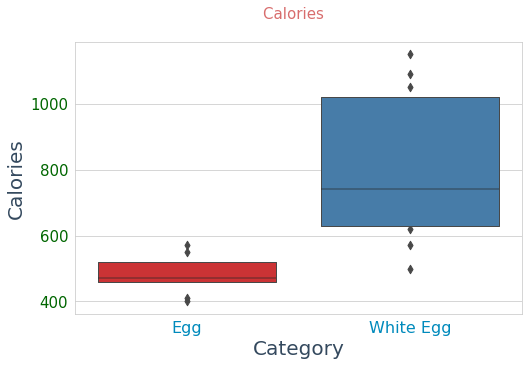

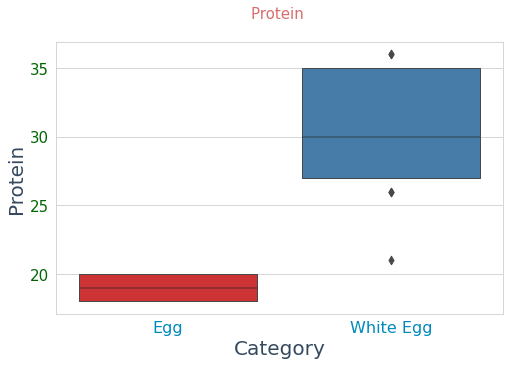

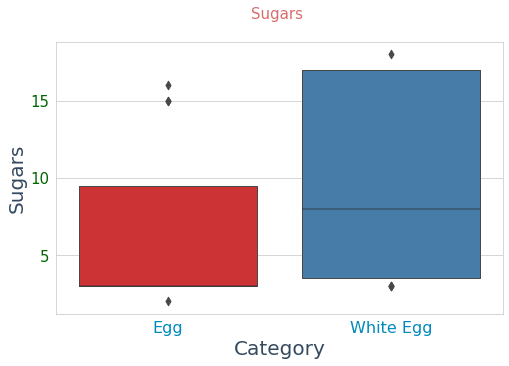

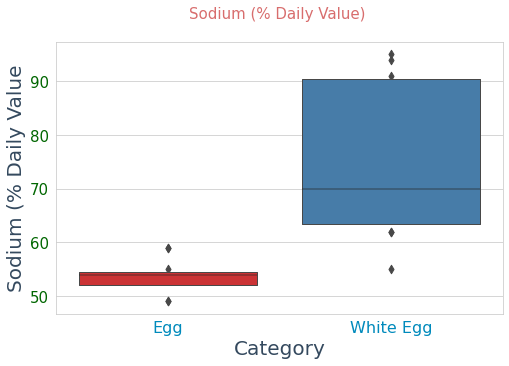

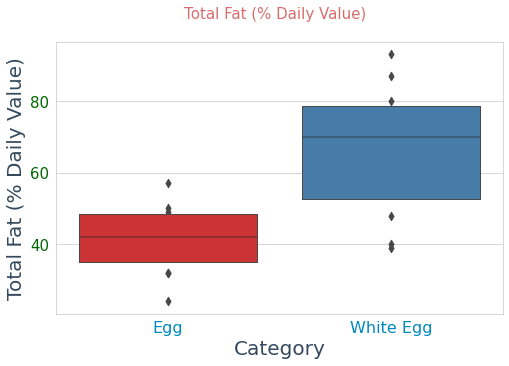

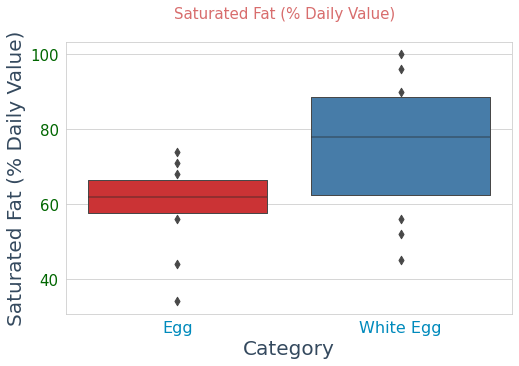

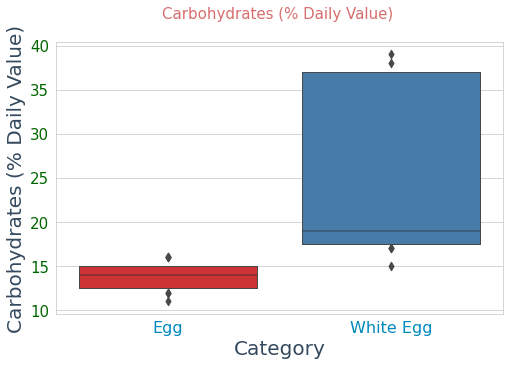

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Calories', data=df_eggmerge, color='#eeeeee', palette="Set1")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Calories  \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Calories',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Protein', data=df_eggmerge, color='#eeeeee', palette="Set1")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Protein \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Protein',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()


ax = sns.boxenplot(x="Category", y='Sugars', data=df_eggmerge, color='#eeeeee', palette="Set1")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Sugars \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Sugars',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Sodium (% Daily Value)', data=df_eggmerge, color='#eeeeee', palette="Set1")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Sodium (% Daily Value) \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Sodium (% Daily Value',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()


ax = sns.boxenplot(x="Category", y='Total Fat (% Daily Value)', data=df_eggmerge, color='#eeeeee', palette="Set1")


# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Total Fat (% Daily Value)  \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Total Fat (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Saturated Fat (% Daily Value)', data=df_eggmerge, color='#eeeeee', palette="Set1")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Saturated Fat (% Daily Value)  \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Saturated Fat (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Carbohydrates (% Daily Value)', data=df_eggmerge, color='#eeeeee', palette="Set1")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Carbohydrates (% Daily Value) \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Carbohydrates (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')
plt.show()

Based on the boxplot above, from all of the nutritional value's parameter white egg give higher nutritional value in number than normal egg. 



---

We wil find what menu to order in order to meet one day's nutritional requirements

In [32]:
MenuItems = df.Item.tolist()
Calories = df.set_index('Item')['Calories'].to_dict()
TotalFat = df.set_index('Item')['Total Fat'].to_dict()
SaturatedFat = df.set_index('Item')['Saturated Fat'].to_dict()
Carbohydrates = df.set_index('Item')['Carbohydrates'].to_dict()
Sugars = df.set_index('Item')['Sugars'].to_dict()
Protein = df.set_index('Item')['Protein'].to_dict()
Sodium = df.set_index('Item')['Sodium'].to_dict()

# Energy: 8,400kJ/2,000kcal
# Total fat: less than 70g
# Saturates: less than 20g
# Carbohydrate: at least 260g
# Total sugars: 90g
# Protein: 50g
# Salt: less than 6g

prob = LpProblem("McOptimization Problem", LpMinimize)
MenuItems_vars = LpVariable.dicts("MenuItems",MenuItems,lowBound=0, upBound=10,cat='Integer')
prob += lpSum([Calories[i]*MenuItems_vars[i] for i in MenuItems]), "Calories"
prob += lpSum([TotalFat[i]*MenuItems_vars[i] for i in MenuItems]) <= 70, "TotalFat"
prob += lpSum([SaturatedFat[i]*MenuItems_vars[i] for i in MenuItems]) <= 20, "Saturated Fat"
prob += lpSum([Carbohydrates[i]*MenuItems_vars[i] for i in MenuItems]) >= 260, "Carbohydrates_lower"
# prob += lpSum([Carbohydrates[i]*MenuItems_vars[i] for i in MenuItems]) <= 360, "Carbohydrates_upper"
prob += lpSum([Sugars[i]*MenuItems_vars[i] for i in MenuItems]) >= 80, "Sugars_lower"
prob += lpSum([Sugars[i]*MenuItems_vars[i] for i in MenuItems]) <= 100, "Sugars_upper"

prob += lpSum([Protein[i]*MenuItems_vars[i] for i in MenuItems]) >= 45, "Protein_lower"
prob += lpSum([Protein[i]*MenuItems_vars[i] for i in MenuItems]) <= 55, "Protein_upper"

prob += lpSum([Sodium[i]*MenuItems_vars[i] for i in MenuItems]) <= 6000, "Sodium"


prob.writeLP("McOptimization.lp")
prob.solve()
data_matrix = []
data_matrix.append(['Item', 'Amount','Calories','Total Fat','Carbohydrates','Protein','Sodium'])

print("Status:", LpStatus[prob.status])
for v in prob.variables():
    if v.varValue > 0:
        Item = df.loc[df['Item'] == v.name.replace('MenuItems_','').replace('_',' ')]
        Item_Calories = Item['Calories'].values*v.varValue
        Item_TotalFat = Item['Total Fat'].values*v.varValue
        Item_Carbohydrates = Item['Carbohydrates'].values*v.varValue
        Item_Protein = Item['Protein'].values*v.varValue
        Item_Sodium = Item['Sodium'].values*v.varValue


        data_matrix.append([v.name.replace('MenuItems_','').replace('_',' '),v.varValue,Item_Calories[0], \
                           Item_TotalFat[0],Item_Carbohydrates[0],Item_Protein[0],Item_Sodium[0]])


print(' ')
results = {}
print("Total Calories = ", value(prob.objective))
for constraint in prob.constraints:
    s = 0
    for var, coefficient in prob.constraints[constraint].items():
        sum = var.varValue * coefficient
    results[prob.constraints[constraint].name.replace('_lower','').replace('_upper','')] = s  



result = pd.DataFrame(data_matrix[1:], columns=data_matrix[0]) 
result

Status: Optimal
 
Total Calories =  1370.0


/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1198: UserWarning:

Spaces are not permitted in the name. Converted to '_'



,Item,Amount,Calories,Total Fat,Carbohydrates,Protein,Sodium
0,Apple Slices,2.0,30.0,0.0,8.0,0.0,0.0
1,Diet Dr Pepper (Large),7.0,0.0,0.0,0.0,28.0,980.0
2,Fruit & Maple Oatmeal without Brown Sugar,5.0,1300.0,20.0,245.0,25.0,575.0
3,Side Salad,2.0,40.0,0.0,8.0,2.0,20.0


The least number of items could order from the menu to meet one day's nutritional requirements is 


1.   2 Apple Slices
2.   7 Diet Dr Pepper (Large)
3.   5 Fruit & Maple Oatmeal without Brown Sugar
4.   2 Side Salad
